In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [2]:
#load dataset
df = pd.read_csv("creditcard.csv")

In [3]:
# Display the first five rows of DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Summary of credit card dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Normal: 284315
Fraudulent: 492


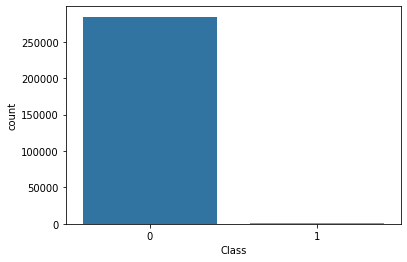

In [5]:
print('Normal:', df['Class'].value_counts().values[0])
print('Fraudulent:', df['Class'].value_counts().values[1])
sns.countplot(df["Class"])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

From the plot and count values obtained,we can see that the dataset is highly imbalanced

In [7]:
X = df.drop(["Class"], axis=1).values #Setting the X to do the split
y = df["Class"].values # transforming the values in array

Random forest classifier

In [8]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4),classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)
print('Original dataset shape {}'.format(Counter(y_train)))
X_smote, y_smote = SMOTE().fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_smote)))

Original dataset shape Counter({0: 227437, 1: 408})
Resampled dataset shape Counter({0: 227437, 1: 227437})


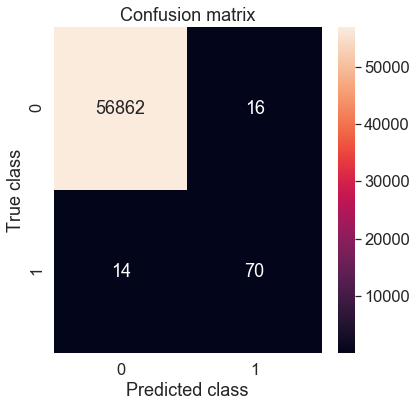


Pipeline Score: 0.9994733330992591
accuracy: 0.9994733330992591
precision: 0.813953488372093
recall: 0.8333333333333334
f2: 0.8293838862559242


In [9]:
cm=confusion_matrix(y_test, smote_prediction)
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(cm,annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print('\nPipeline Score:',smote_pipeline.score(X_test, y_test))
print("accuracy:",accuracy_score(y_test, smote_prediction))
print("precision:",precision_score(y_test, smote_prediction))
print("recall:",recall_score(y_test, smote_prediction))
print("f2:",fbeta_score(y_test, smote_prediction, beta=2))

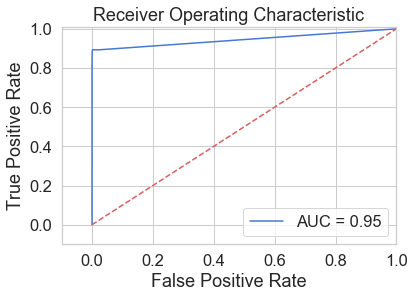

In [23]:
from sklearn.metrics import auc,roc_curve
# predicted probabilities
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
from sklearn.model_selection import KFold,cross_val_score

Logistic Regression

In [25]:
logreg = LogisticRegression(C=1, penalty='l2',random_state=2)
logreg.fit(X_train, y_train)
print("Cross Validation Score:",cross_val_score(logreg,X_train, y_train, cv=5, scoring='recall'))

Cross Validation Score: [0.69512195 0.56097561 0.67073171 0.66666667 0.62962963]


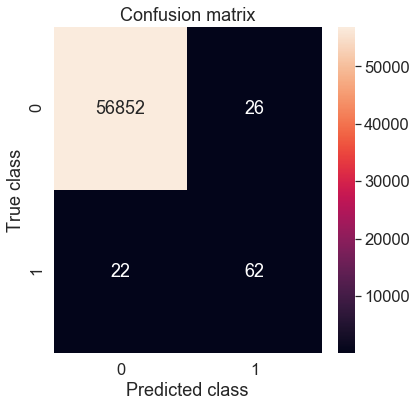

accuracy: 0.9991573329588147
precision: 0.7045454545454546
recall: 0.7380952380952381
f2: 0.7311320754716982


In [26]:
# Predicting with the best params
y_pred = logreg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(cm,annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))
print("f2:",fbeta_score(y_test, y_pred, beta=2))

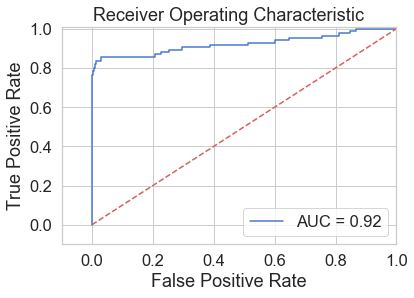

In [27]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()